In [2]:
## What am I doing here? I am going to change Parrish plasmids to ETP.

%matplotlib inline
%pylab inline
import pandas as pd
import scipy.stats as stats
import scipy.cluster.hierarchy as clust
import seaborn as sns
import matplotlib.pyplot as plt
reads = pd.read_csv('../InputData/Parrish\GSE178179_pgPEN_counts_PC9.txt', index_col=0, sep='\t')


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
reads.columns

Index(['gRNA1_seq', 'gRNA2_seq', 'paralog_pair', 'PC9_plasmid', 'PC9_LTP_RepA',
       'PC9_LTP_RepB', 'PC9_LTP_RepC', 'PC9_ETP_RepA', 'PC9_ETP_RepB',
       'PC9_ETP_RepC', 'HeLa_plasmid', 'HeLa_ETP', 'HeLa_LTP_RepA',
       'HeLa_LTP_RepB', 'HeLa_LTP_RepC'],
      dtype='object')

In [4]:
reads.drop(['gRNA1_seq', 'gRNA2_seq', 'PC9_plasmid', 'PC9_LTP_RepA', 'PC9_LTP_RepB', 'PC9_LTP_RepC',
           'PC9_ETP_RepA', 'PC9_ETP_RepB', 'PC9_ETP_RepC', 'HeLa_plasmid'], axis=1, inplace=True)
reads


,paralog_pair,HeLa_ETP,HeLa_LTP_RepA,HeLa_LTP_RepB,HeLa_LTP_RepC
pgRNA_id,,,,,
AADAC_AADACL2_pg1,AADAC|AADACL2,1315,1481,1715,2084
AADAC_AADACL2_pg10,AADAC|AADACL2,1201,1276,2339,1416
AADAC_AADACL2_pg11,AADAC|AADACL2,171,148,6,91
AADAC_AADACL2_pg12,AADAC|AADACL2,689,931,852,779
AADAC_AADACL2_pg13,AADAC|AADACL2,236,411,545,888
...,...,...,...,...,...
NTpg95,NTpg95|NA,771,1150,1608,1743
NTpg96,NTpg96|NA,851,1110,2173,2305
NTpg97,NTpg97|NA,964,2186,1735,2554


In [5]:
numGuides, numSamples = reads.shape

numGuides, numSamples 
reads

,paralog_pair,HeLa_ETP,HeLa_LTP_RepA,HeLa_LTP_RepB,HeLa_LTP_RepC
pgRNA_id,,,,,
AADAC_AADACL2_pg1,AADAC|AADACL2,1315,1481,1715,2084
AADAC_AADACL2_pg10,AADAC|AADACL2,1201,1276,2339,1416
AADAC_AADACL2_pg11,AADAC|AADACL2,171,148,6,91
AADAC_AADACL2_pg12,AADAC|AADACL2,689,931,852,779
AADAC_AADACL2_pg13,AADAC|AADACL2,236,411,545,888
...,...,...,...,...,...
NTpg95,NTpg95|NA,771,1150,1608,1743
NTpg96,NTpg96|NA,851,1110,2173,2305
NTpg97,NTpg97|NA,964,2186,1735,2554


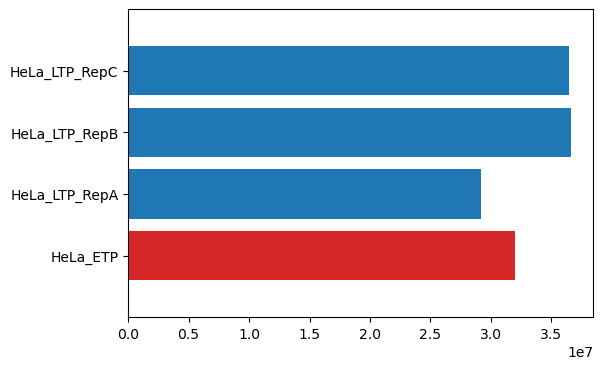

In [6]:
sample_sum = reads.iloc[:,range(1,numSamples)].sum(0)
highlight_index = 0
colors = ['tab:blue'] * len(sample_sum)
colors[highlight_index] = 'tab:red'
figure( figsize(6,4))
barh( arange(len(sample_sum)), sample_sum, align='center', color = colors)
#plot( [-0.5, len(sample_sum)-0.5], [numGuides*500, numGuides*500], 'r--')  #This is for the red dashed line, r for red
#Format string fmt = '[marker][line][color]' why is this line

ylim(-1, len(sample_sum)) # len(sample_sum) = 10
yticks(arange(len(sample_sum)), reads.columns.values[1:], rotation=0)

show()


In [7]:
pseudo=5

reads[ reads.columns[1:]] = reads[ reads.columns[1:]] + pseudo
#reads.head()

In [8]:
meanReads = reads.iloc[:,range(1,numSamples)].mean(0) # colmean
meanReads

HeLa_ETP          970.580042
HeLa_LTP_RepA     883.640669
HeLa_LTP_RepB    1109.255080
HeLa_LTP_RepC    1103.833012
dtype: float64

In [9]:
# also remove double control "pgRNAs. Five hundred double non-targeting pgRNAs were included as a control"
filtered_reads = reads[reads['paralog_pair'].str.contains('^NTpg.*\|NA$')].index
filtered_reads.shape
filtered_reads

Index(['NTpg1', 'NTpg10', 'NTpg100', 'NTpg101', 'NTpg102', 'NTpg103',
       'NTpg104', 'NTpg105', 'NTpg106', 'NTpg107',
       ...
       'NTpg90', 'NTpg91', 'NTpg92', 'NTpg93', 'NTpg94', 'NTpg95', 'NTpg96',
       'NTpg97', 'NTpg98', 'NTpg99'],
      dtype='object', name='pgRNA_id', length=500)

In [10]:
#reads['paralog_pair'].str.contains('^NTpg.*\|NA$')
reads.drop(filtered_reads, axis = 0, inplace = True)
reads

,paralog_pair,HeLa_ETP,HeLa_LTP_RepA,HeLa_LTP_RepB,HeLa_LTP_RepC
pgRNA_id,,,,,
AADAC_AADACL2_pg1,AADAC|AADACL2,1320,1486,1720,2089
AADAC_AADACL2_pg10,AADAC|AADACL2,1206,1281,2344,1421
AADAC_AADACL2_pg11,AADAC|AADACL2,176,153,11,96
AADAC_AADACL2_pg12,AADAC|AADACL2,694,936,857,784
AADAC_AADACL2_pg13,AADAC|AADACL2,241,416,550,893
...,...,...,...,...,...
nt4_ZYG11A,nt4|ZYG11A,695,339,1050,577
nt5_ZYG11A,nt5|ZYG11A,2267,3679,4922,4188
nt6_ZYG11A,nt6|ZYG11A,601,675,1255,1483


In [11]:
numGuides, numSamples = reads.shape

numGuides, numSamples 

(32670, 5)

In [12]:
normed = pd.DataFrame(index=reads.index, columns=reads.columns) # empty data frame
normed['paralog_pair'] = reads.iloc[:, 0]
normed.rename(columns={"paralog_pair": "GENE"}, inplace = True)
normed
#pseudo has already been added to reads
#The numpy.tile() function constructs a new array by repeating array – ‘arr’, 
#the number of times we want to repeat as per repetitions. 
#The resulted array will have dimensions max(arr.ndim, repetitions) where, 
#repetitions is the length of repetitions. If arr.ndim > repetitions,
#reps is promoted to arr.ndim by pre-pending 1’s to it.
#If arr.ndim < repetitions, reps is promoted to arr.ndim by pre-pending new axis. Syntax : 
normed[ normed.columns[1:] ] =   (reads.iloc[:, range(1, numSamples)] ) / np.tile(meanReads.values, [numGuides, 1]) * 500  # normalize to mean 500 read
normed.head()


,GENE,HeLa_ETP,HeLa_LTP_RepA,HeLa_LTP_RepB,HeLa_LTP_RepC
pgRNA_id,,,,,
AADAC_AADACL2_pg1,AADAC|AADACL2,680.005740,840.839524,775.295075,946.248200
AADAC_AADACL2_pg10,AADAC|AADACL2,621.277972,724.842147,1056.564916,643.666200
AADAC_AADACL2_pg11,AADAC|AADACL2,90.667432,86.573652,4.958282,43.484838
AADAC_AADACL2_pg12,AADAC|AADACL2,357.518169,529.627049,386.295278,355.126179
AADAC_AADACL2_pg13,AADAC|AADACL2,124.152563,235.389800,247.914123,404.499589


In [13]:
fc = pd.DataFrame(index=reads.index, columns=reads.columns[[2,3,4]]) # non-normalised
fc['GENE'] = reads['paralog_pair']  # first column is gene name
fc
#fc.shape # share is for dimensions - nice
numFCsamples = fc.shape[1]-1   # number of columns for which to calculate FC
numFCsamples
#fc.head()
pseudo = 0 # remmeber pseudocount is already in the data 
fc.head()
## rearrane here 
cols = ['GENE' ,'HeLa_LTP_RepA' ,'HeLa_LTP_RepB' ,'HeLa_LTP_RepC']
fc = fc[cols]
fc

## VERY IMPORTANT TO REARRANGE NORMED HERE
cols = ['GENE', 'HeLa_LTP_RepA', 'HeLa_LTP_RepB', 'HeLa_LTP_RepC', 'HeLa_ETP']
normed = normed[cols]

fc[ fc.columns[1:] ] = log2( (normed[ normed.columns[1:-1]] + pseudo) / np.tile( normed[ normed.columns[-1]] + pseudo , [numFCsamples, 1]).T )
fc

,GENE,HeLa_LTP_RepA,HeLa_LTP_RepB,HeLa_LTP_RepC
pgRNA_id,,,,
AADAC_AADACL2_pg1,AADAC|AADACL2,0.306284,0.189199,0.476672
AADAC_AADACL2_pg10,AADAC|AADACL2,0.222428,0.766071,0.051074
AADAC_AADACL2_pg11,AADAC|AADACL2,-0.066656,-4.192672,-1.060072
AADAC_AADACL2_pg12,AADAC|AADACL2,0.566960,0.111687,-0.009685
AADAC_AADACL2_pg13,AADAC|AADACL2,0.922938,0.997726,1.704024
...,...,...,...,...
nt4_ZYG11A,nt4|ZYG11A,-0.900340,0.402632,-0.454044
nt5_ZYG11A,nt5|ZYG11A,0.833917,0.925788,0.699874
nt6_ZYG11A,nt6|ZYG11A,0.302910,0.869578,1.117479


In [14]:
## Anything with nt  is control in this study
fc_base = pd.DataFrame(index=fc.index, columns=fc.columns) # non-normalised
fc_base.iloc[:] = fc.iloc[:]
fc_base
fc_base[['GENE1', 'GENE2']] = fc_base.GENE.str.split("|", expand = True)
fc_base.drop(['GENE'], inplace = True,axis=1)
fc_base
fc_base.loc[fc_base['GENE1'].str.contains('^nt[0-8]{1}'),'GENE1'] = 'control'
fc_base.loc[fc_base['GENE2'].str.contains('^nt[0-8]{1}'),'GENE2'] = 'control'

fc_base

,HeLa_LTP_RepA,HeLa_LTP_RepB,HeLa_LTP_RepC,GENE1,GENE2
pgRNA_id,,,,,
AADAC_AADACL2_pg1,0.306284,0.189199,0.476672,AADAC,AADACL2
AADAC_AADACL2_pg10,0.222428,0.766071,0.051074,AADAC,AADACL2
AADAC_AADACL2_pg11,-0.066656,-4.192672,-1.060072,AADAC,AADACL2
AADAC_AADACL2_pg12,0.56696,0.111687,-0.009685,AADAC,AADACL2
AADAC_AADACL2_pg13,0.922938,0.997726,1.704024,AADAC,AADACL2
...,...,...,...,...,...
nt4_ZYG11A,-0.90034,0.402632,-0.454044,control,ZYG11A
nt5_ZYG11A,0.833917,0.925788,0.699874,control,ZYG11A
nt6_ZYG11A,0.30291,0.869578,1.117479,control,ZYG11A


In [15]:
cells = list([ 'HeLa'])
cols = list(['GENE1']) + list( ['GENE2']) + cells
cols
fc_merge = pd.DataFrame( columns=cols, index=fc_base.index, dtype=float)
fc_merge.GENE1 = fc_base.GENE1
fc_merge.GENE2 = fc_base.GENE2

for cell in cells:
    samples = [x for x in fc_base.columns if cell in x]
    fc_merge[cell] = fc[ samples ].mean(1)

fc_merge

,GENE1,GENE2,HeLa
pgRNA_id,,,
AADAC_AADACL2_pg1,AADAC,AADACL2,0.324051
AADAC_AADACL2_pg10,AADAC,AADACL2,0.346524
AADAC_AADACL2_pg11,AADAC,AADACL2,-1.773133
AADAC_AADACL2_pg12,AADAC,AADACL2,0.222988
AADAC_AADACL2_pg13,AADAC,AADACL2,1.208229
...,...,...,...
nt4_ZYG11A,control,ZYG11A,-0.317251
nt5_ZYG11A,control,ZYG11A,0.819860
nt6_ZYG11A,control,ZYG11A,0.763322


In [16]:
is_ctrl = where( (fc_merge.GENE1=='control') | (fc_merge.GENE2=='control') )[0]

is_ctrl1 = where( fc_merge.GENE1=='control' )[0]
is_ctrl2 = where( fc_merge.GENE2=='control' )[0]


smf_gene1 = fc_merge.iloc[is_ctrl2].groupby('GENE1').mean(numeric_only = True) # calculate means of multiple runs of same gene
smf_gene2 = fc_merge.iloc[is_ctrl1].groupby('GENE2').mean(numeric_only = True)


smf_guide1 = fc_merge.iloc[is_ctrl2].groupby('GENE1')
smf_guide2 = fc_merge.iloc[is_ctrl1].groupby('GENE2')

In [17]:
smf_gene = pd.concat([smf_gene1, smf_gene2], ignore_index=False)#smf_gene = smf_gene1.join(smf_gene2, lsuffix='_Aposn', rsuffix='_Bposn')
smf_gene# mean of same gene-control pair has already been calculated

,HeLa
A2M,0.710695
AADAC,0.238224
AADACL3,0.586710
ABCC1,0.138558
ABCC8,0.437026
...,...
ZNF703,0.241804
ZNF76,-0.394614
ZNF773,0.336654
ZNF81,0.398020


In [18]:
pairs = fc_merge[(fc_merge['GENE1'] != "control") & (fc_merge['GENE2'] != "control")] # These are all experiments without control,
pairs =  pairs[["GENE1", "GENE2"]]
pairs =pairs.drop_duplicates(keep='first')
pairs.insert(2, "GENE1_GENE2",np.tile("ZZ",len(pairs)), True)
pairs
pairs.columns
for ind in pairs.index:
    g1 = pairs.loc[ind, 'GENE1']
    g2 = pairs.loc[ind, 'GENE2']
    newval = g1 + "_" + g2
    if g1 > g2:
        newval = g2 + "_" + g1
    pairs.loc[ind,"GENE1_GENE2"] = newval
#    print(g1_g2)
#print(pairs.columns)
   
pairs
pairs.drop_duplicates(subset="GENE1_GENE2", keep="first",inplace = True)
print(len(pairs)) # From Paper: we here report our direct experimental evaluation of GIs among 1,030 paralog pairs (2,060 genes) in two human cell contexts.

1030


In [19]:
dLFC = pd.DataFrame( index=list(pairs.GENE1 + "_" + pairs.GENE2), columns=fc_merge.columns[2:], dtype=float)
dLFC

,HeLa
AADAC_AADACL2,NaN
AADACL3_AADACL4,NaN
ABCC1_ABCC3,NaN
ABCC8_ABCC9,NaN
ABCD1_ABCD2,NaN
...,...
ZNF503_ZNF703,NaN
ZNF143_ZNF76,NaN
ZNF419_ZNF773,NaN
ZNF175_ZNF81,NaN


In [20]:
smf = smf_gene
for pair_idx in pairs.index:
    g1 = pairs.loc[pair_idx].GENE1
    g2 = pairs.loc[pair_idx].GENE2
    expt_idx  = list( where( ( (fc_merge.GENE1==g1) & (fc_merge.GENE2==g2) )  | ( (fc_merge.GENE1==g2) & (fc_merge.GENE2==g1)  ))[0] )
    
    if ( len(expt_idx)==0 ):
        continue
    smf_sum = smf.loc[g1] + smf.loc[g2]
    expt = fc_merge.iloc[ expt_idx ]
    genepair = g1 + "_" + g2
    dLFC.loc[genepair] = expt.median(0,numeric_only=True) - smf_sum

In [21]:
zdLFC = pd.DataFrame( index=dLFC.index, columns=dLFC.columns, dtype=float ) 
zdLFC.head()
percentile = 2.5
for col in zdLFC.columns:
    #print(col)
    top = np.percentile( dLFC.loc[:,col], percentile)
    bot = np.percentile( dLFC.loc[:,col], 100-percentile)
    #print(top,bot)
    mu = dLFC.iloc[ where( (dLFC[col]>top) & (dLFC[col]<bot))[0] ][col].mean() # This is because our dist is truncated normal
    std = dLFC.iloc[ where( (dLFC[col]>top) & (dLFC[col]<bot))[0] ][col].std()
    #print(mu, std)
    zdLFC[col] = (dLFC[col] - mu) / std

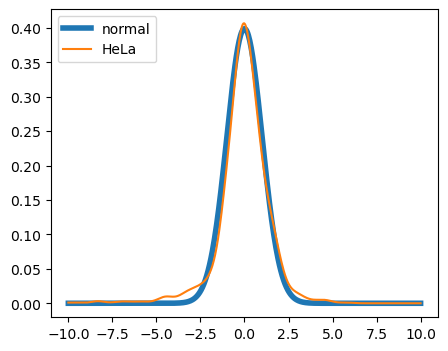

In [22]:
xx = linspace(-10,10,500)
kde_HeLa = stats.gaussian_kde( zdLFC.HeLa )
figure( figsize(5,4) )
plot( xx, stats.norm.pdf( xx), label='normal', linewidth=4 )
plot( xx, kde_HeLa.evaluate(xx), label='HeLa')

legend(loc=2)
#savefig('normfit-of-zdLFC.pdf')
show()


In [25]:
def reindex_alphbetically(df):
    result = []
    for index, row in df.iterrows():
        a, b = index.split('_')
        if a < b:
            result.append(f'{a}_{b}')
        else:
            result.append(f'{b}_{a}')
    
    
    return(result)


zdLFC.index = reindex_alphbetically(zdLFC)
zdLFC.to_csv("zdLFC Output/Parrish_Hela.csv", index=True)  # Set index=False to exclude the index column